In [1]:
import pandas as pd
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing="public", theme="space", offline=True)

In [2]:
# import datasets
df_internet = pd.read_csv("final.csv")
df_gdp = pd.read_csv("world_gdp.csv")

In [3]:
df_internet.head(3)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0


In [4]:
df_gdp.head(3)

,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,2.129059e+10,162.726326
2,Afghanistan,AFG,1960,5.377778e+08,59.773234


In [5]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        16492 non-null  object 
 1   Country Code        16492 non-null  object 
 2   year                16492 non-null  int64  
 3   GDP_USD             13118 non-null  float64
 4   GDP_per_capita_USD  13115 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 644.3+ KB


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB


In [7]:
df_internet.isnull().sum()

Unnamed: 0                0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [8]:
df_gdp.isnull().sum()

Country Name             0
Country Code             0
year                     0
GDP_USD               3374
GDP_per_capita_USD    3377
dtype: int64

### Pre-Processing

###### Internet Dataframe

In [9]:
# rename column and set index
df_internet.rename(columns={"Unnamed: 0":"index"}, inplace=True)
df_internet.set_index("index", inplace=True)

In [10]:
# Eleminating countries outside ASEAN
asean_countries_list = ["IDN", "KHM", "SGP", "VNM", "MMR", "THA", "BRN", "LAO", "MYS", "PHL"]
df_asean_internet = df_internet[df_internet["Code"].isin(asean_countries_list)]
# resetting index
df_asean_internet = df_asean_internet.reset_index()

In [11]:
df_asean_internet.head(3)

,index,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,1093,Brunei,BRN,1980,0.0,0.0,0,0.0
1,1094,Brunei,BRN,1981,0.0,0.0,0,0.0
2,1095,Brunei,BRN,1982,0.0,0.0,0,0.0


In [12]:
# create pivot table
df_pivot_internet_users = df_asean_internet.pivot(index="Year", columns="Entity", values="Internet Users(%)")
# check for null values
df_pivot_internet_users.isnull().sum()

Entity
Brunei         1
Cambodia       0
Indonesia      0
Laos           0
Malaysia       1
Myanmar        0
Philippines    0
Singapore      4
Thailand       0
Vietnam        0
dtype: int64

In [13]:
# replace null values
df_pivot_internet_users.fillna(0, inplace=True)

# replace missing value in cambodia column(2018-2020)
df_pivot_internet_users.loc[2018, "Cambodia"] = df_pivot_internet_users.loc[2018, :].median()
df_pivot_internet_users.loc[2019, "Cambodia"] = df_pivot_internet_users.loc[2019, :].median()
df_pivot_internet_users.loc[2020, "Cambodia"] = df_pivot_internet_users.loc[2020, :].median()

In [14]:
df_pivot_internet_users.tail(3)

Entity,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
Year,,,,,,,,,,
2018,95.0,50.458740,39.904640,29.100000,81.201050,28.700001,44.099998,88.165634,56.817482,69.847931
2019,95.0,57.171534,47.690647,30.840000,84.187141,34.900002,43.026611,88.949249,66.652420,68.661583
2020,95.0,62.013248,53.726494,33.799999,89.555016,35.099998,49.799999,92.004349,77.843742,70.300003


###### GDP Dataframe

In [15]:
# Filter ASEAN countries
df_asean_gdp = df_gdp[df_gdp["Country Code"].isin(asean_countries_list)]
# remove year under 1980
df_asean_gdp = df_asean_gdp[(df_asean_gdp["year"] > 1979) & (df_asean_gdp["year"] < 2021)]
# Check for Null values
df_asean_gdp.isnull().sum()

Country Name           0
Country Code           0
year                   0
GDP_USD               22
GDP_per_capita_USD    22
dtype: int64

In [16]:
# drop Null values and reset index
df_asean_gdp = df_asean_gdp.dropna().reset_index()
# rename columns for merge
df_asean_gdp.rename(columns={"Country Code":"Code"}, inplace=True)

In [17]:
df_asean_gdp.head(3)

,index,Country Name,Code,year,GDP_USD,GDP_per_capita_USD
0,5351,Brunei Darussalam,BRN,1980,4.928825e+09,25422.039190
1,5426,Indonesia,IDN,1980,7.248234e+10,491.579533
2,5480,Myanmar,MMR,1980,1.010597e+09,29.528620


In [18]:
# pivot table for gdp
df_pivot_asean_gdp = df_asean_gdp.pivot(index="year",columns="Country Name", values="GDP_USD")
# drop null values
df_pivot_asean_gdp.dropna(inplace=True)

In [19]:
# pivot table for gdp per capita
df_pivot_asean_capita = df_asean_gdp.pivot(index="year",columns="Country Name", values="GDP_per_capita_USD")
# drop null values
df_pivot_asean_capita.dropna(inplace=True)

In [20]:
df_pivot_asean_capita.head(3)

Country Name,Brunei Darussalam,Cambodia,Indonesia,Lao PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
year,,,,,,,,,,
1993,14575.57459,254.116635,827.905266,287.394843,3433.162787,65.510583,931.566127,18290.02824,2209.363030,182.308402
1994,14120.95256,270.542940,912.203294,325.941612,3728.110481,88.087470,1073.017568,21553.03090,2491.427836,221.129175
1995,15933.45283,322.931575,1026.393436,363.880052,4329.707998,111.140780,1212.944437,24914.41126,2846.586834,276.812663


### Southeast Asia Internet User Percentage Growth

In [21]:
df_pivot_internet_users.iplot(kind="line", xTitle="Year", yTitle="Users(%)", title="Internet User Growth (%)")

Countries that were early adopters of the internet, such as Brunei, Singapore, and Malaysia, generally have a higher percentage of internet users than others. Additionally, in 2014, there was a significant increase in user percentages in each country. There is a possibility that this sharp increase was caused by several factors, such as increased smartphone adoption, the rise of social media, and e-commerce growth.

### Internet User Percentage Rank in Southeast Asia (2020)

In [22]:
# Filter and sort values
a = df_pivot_internet_users[df_pivot_internet_users.index.isin([2020])].sort_values(2020, axis=1)

a.iplot(kind="bar", xTitle="Year", yTitle="% of Internet Users", title="Internet User Percentage (2020)")


Despite Indonesia contributing 40.8% to the total population of the ASEAN region, it ranks among the countries with the lowest internet usage percentage with numbers barely reach 50%

### GDP Growth in Southeast Asia

In [23]:
df_pivot_asean_gdp.iplot(kind="line", xTitle="Year", yTitle="GDP", title="GDP Growth")

Although Indonesia has the highest GDP, only 53.73% of the population in Indonesia currently uses the internet. This data may indicate that there is a significant economic disparity in Indonesia or a low level of digital literacy.

### GDP per capita in Southeast Asia

In [24]:
b = df_pivot_asean_capita[df_pivot_asean_capita.index.isin([2020])].sort_values(2020, axis=1)

b.iplot(kind="bar", title="GDP per Capita")

By examining the GDP per Capita and internet User Percentage (2020) barchart, we can conclude that countries with a high GDP per capita tend to have higher internet user percentage. Also, the chart above confirms my hypothesis about the economic disparity that is happening in Indonesia is true

In [25]:
# rename column for merge condition
df_asean_gdp.rename(columns={"year":"Year"}, inplace=True)
# merge 2 dataframes
df_merge = df_asean_gdp.merge(df_asean_internet, on=["Year", "Code"] , how="inner")

In [26]:
df_merge.tail(5)

,index_x,Country Name,Code,Year,GDP_USD,GDP_per_capita_USD,index_y,Entity,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
377,16129,Malaysia,MYS,2020,3.370060e+11,10412.347670,4938,Malaysia,135.091156,89.555016,29732254,10.377557
378,16147,Philippines,PHL,2020,3.617510e+11,3301.218603,6460,Philippines,136.501129,49.799999,55871109,7.242650
379,16168,Singapore,SGP,2020,3.452960e+11,60729.450350,7166,Singapore,144.347122,92.004349,5437341,25.805328
380,16193,Thailand,THA,2020,4.996820e+11,7158.766684,7911,Thailand,166.610367,77.843742,55639332,16.444511
381,16217,Vietnam,VNM,2020,3.432430e+11,3526.274579,8702,Vietnam,142.733368,70.300003,67944025,17.155838


<Axes: xlabel='GDP_per_capita_USD', ylabel='Internet Users(%)'>

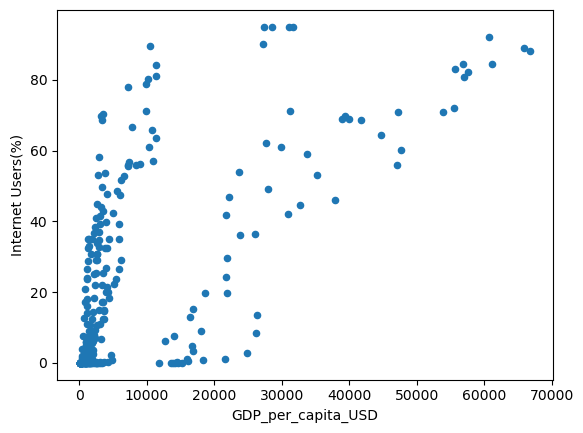

In [27]:
# filter year
z = df_merge[df_merge["Year"] > 1989]
# filter column
z = z[["Year", "Entity", "GDP_per_capita_USD", "Internet Users(%)"]]

z.plot(kind="scatter", x="GDP_per_capita_USD", y="Internet Users(%)")

The graph above indicates that as the GDP per capita of a country increases, the level of internet usage in that country is likely to increase as well.